In [1]:
import cv2
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial import distance
from scipy.stats import multivariate_normal

In [2]:
file_path = 'MVI_2978.MOV'

In [3]:
cap = cv2.VideoCapture(file_path)

In [95]:
frames = []
while True:
    ret, frame = cap.read()
    if ret:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(frame)
    break

1

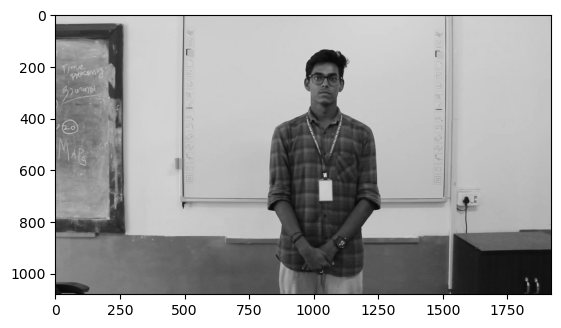

In [39]:
plt.imshow(frames[0], cmap='gray')

In [51]:
pca = PCA(n_components=2)

In [47]:
pca

PCA(n_components=3)

In [41]:
frames = np.array(frames)

In [42]:
frames.shape

(1, 1080, 1920)

In [44]:
x = frames.copy()

In [52]:
x2d = pca.fit(x)

ValueError: Found array with dim 3. PCA expected <= 2.

In [54]:
scaler = StandardScaler()

In [56]:
x = x.reshape(1080, 1920)

In [59]:
xscaled = scaler.fit_transform(x)

In [60]:
xscaled2d = pca.fit_transform(xscaled)

In [62]:
kmeans = KMeans(n_clusters=12, verbose=2, max_iter=500, random_state=2)

In [63]:
kmeans.fit(xscaled2d)

Initialization complete
Iteration 0, inertia 20775.258321442125.
Iteration 1, inertia 15478.141806873138.
Iteration 2, inertia 15139.009027067808.
Iteration 3, inertia 15075.07415685919.
Iteration 4, inertia 15049.545120726854.
Converged at iteration 4: center shift 0.004235323029510015 within tolerance 0.0736373733440688.


C:\Users\Kartik Saxena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(max_iter=500, n_clusters=12, random_state=2, verbose=2)

In [64]:
kmeans.cluster_centers_

array([[-15.09460049, -10.48577857],
       [ 70.34542727,   0.68387364],
       [-26.08241664,  12.92677968],
       [  7.46559176, -22.3645473 ],
       [ 70.00144392,  22.36675729],
       [-27.96296587,  31.9723976 ],
       [ -9.49625191, -19.55349238],
       [ -5.45800604,   2.55548905],
       [-25.90592207,   5.48339002],
       [ 58.51618411,  -3.17716645],
       [ 31.04308628,   3.39476909],
       [ 67.8076495 ,  10.5296726 ]])

In [66]:
kmeans.labels_

array([8, 8, 8, ..., 4, 4, 4])

In [67]:
ress = kmeans.cluster_centers_[kmeans.labels_.flatten()]

In [75]:
kyeframes = []

In [74]:
cap = cv2.VideoCapture(file_path)

ret, prevframe = cap.read()
thresh = 30000

while True:
    ret, currframe = cap.read()
    if ret:
        diff = cv2.absdiff()

In [3]:
frames = []

In [4]:
cap = cv2.VideoCapture(file_path)

In [5]:
while True:
    ret, frame = cap.read()
    if ret:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        frames.append(frame)
    else:
        break

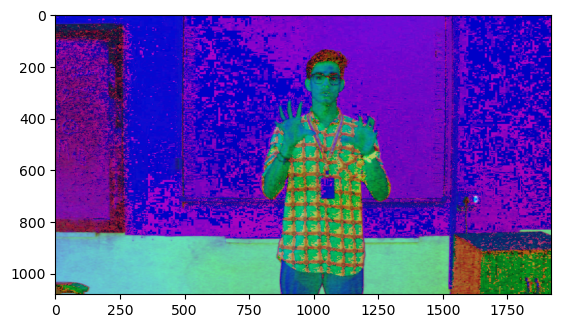

In [6]:
plt.imshow(frames[34])

In [7]:
nhist = cv2.equalizeHist(frames[0])

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:3440: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'cv::equalizeHist'


 ...]

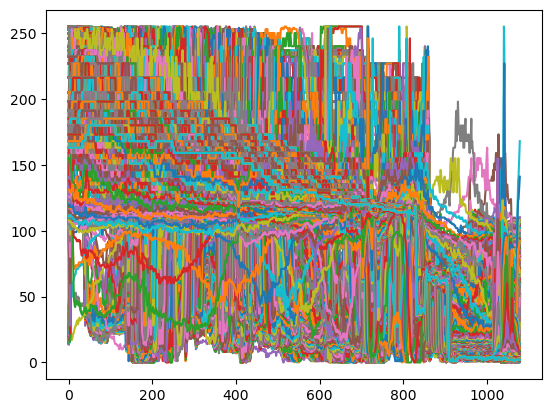

In [118]:
plt.plot(nhist)

In [110]:
arr = [0]*100
arr = np.array(arr)

In [111]:
arr.put(0, 1)

In [115]:
def bhattacharya_distance(mu1, cov1, mu2, cov2):
    dist1 = multivariate_normal(mean=mu1, cov=cov1)
    dist2 = multivariate_normal(mean=mu2, cov=cov2)
    
    dist = np.sqrt(dist1.pdf((mu1 + mu2)/2) * dist.pdf((mu1+mu2)/2) / np.sqrt(dist1.pdf(mu1) * dist2.pdf(mu2)))
    
    return dist

In [11]:
hhist = cv2.calcHist(frames[0], 3, None, 170, [0, 170])

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'calcHist'
> Overload resolution failed:
>  - Can't parse 'channels'. Input argument doesn't provide sequence protocol
>  - Can't parse 'channels'. Input argument doesn't provide sequence protocol
